# Multiple-D input with Neural Networks

## Contents

1. Make some data
2. Neural Network Module and Training function
3. One Neuron
4. Two Neurons
5. Three Neurons

In [1]:
# imoprt libraries

# Import the libraries we need for this lab



import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap
from torch.utils.data import Dataset, DataLoader

torch.manual_seed(2020)

In [2]:
# Plot the data

def plot_decision_regions_2class(model,data_set):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#00AAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#00AAFF'])
    X = data_set.x.numpy()
    y = data_set.y.numpy()
    h = .02
    x_min, x_max = X[:, 0].min() - 0.1 , X[:, 0].max() + 0.1 
    y_min, y_max = X[:, 1].min() - 0.1 , X[:, 1].max() + 0.1 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    XX = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])

    yhat = np.logical_not((model(XX)[:, 0] > 0.5).numpy()).reshape(xx.shape)
    plt.pcolormesh(xx, yy, yhat, cmap=cmap_light)
    plt.plot(X[y[:, 0] == 0, 0], X[y[:, 0] == 0, 1], 'o', label='y=0')
    plt.plot(X[y[:, 0] == 1, 0], X[y[:, 0] == 1, 1], 'ro', label='y=1')
    plt.title("decision region")
    plt.legend()

In [3]:
# Calculate the accuracy

def accuracy(model, dataset):
    return np.mean(dataset.y.view(-1).numpy() == (model(dataset.x)[:, 0] > 0.5).numpy())

## 1. Make some data

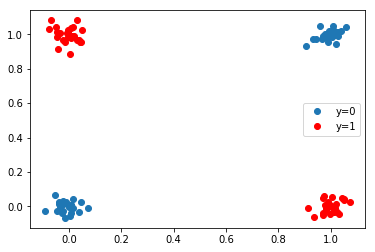

In [4]:
# Create Data class

class XOR_Data(Dataset):
    
    def __init__(self, N_s=100):
        self.x = torch.zeros(N_s, 2)
        self.y = torch.zeros(N_s, 1)
        for i in range(N_s // 4):
            self.x[i, :] = torch.tensor([0.0, 0.0])
            self.y[i, :] = torch.tensor([0.0])
            
            self.x[i + N_s // 4, :] = torch.tensor([0.0, 1.0])
            self.y[i + N_s // 4, :] = torch.tensor([1.0])
            
            self.x[i + N_s // 2, :] = torch.tensor([1.0, 0.0])
            self.y[i + N_s // 2, :] = torch.tensor([1.0])
            
            self.x[i + 3 * N_s // 4, :] = torch.tensor([1.0, 1.0])
            self.y[i + 3 * N_s // 4, :] = torch.tensor([0.0])
            
            self.x = self.x + 0.01 * torch.randn(N_s, 2)
        self.len = self.x.shape[0]
        
        
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    
    def __len__(self):
        return self.len
    
    # Plot the data
    def plot_stuff(self):
        plt.plot(self.x[self.y[:, 0] == 0, 0].numpy(), self.x[self.y[:, 0] == 0, 1].numpy(), 'o', label="y=0")
        plt.plot(self.x[self.y[:, 0] == 1, 0].numpy(), self.x[self.y[:, 0] == 1, 1].numpy(), 'ro', label="y=1")
        plt.legend()
        
        
# Create dataset object
data_set = XOR_Data()
data_set.plot_stuff()

## 2. Neural Network Module

In [5]:
# Define the Net clas

class Net(nn.Module):
    
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        # Hidden layer
        self.linear1 = nn.Linear(D_in, H)
        # output layer
        self.linear2 = nn.Linear(H, D_out)
        
    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))
        x = torch.sigmoid(self.linear2(x))
        return x

In [6]:
# Define the train function

def train(model, dataset, criterion, optimizer, accuracy, epochs=5):
    
    COST = []
    ACC = []
    train_loader = DataLoader(dataset=dataset, batch_size=10)
    # Loop
    for epoch in range(epochs):
        total = 0
        for x, y in train_loader:
            yhat = model(x)
            loss = criterion(yhat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            total += loss.item()
        COST.append(total)
        acc = accuracy(model, dataset)
        ACC.append(acc)
        
    # plot    
    fig, ax1 = plt.subplots()
    color = 'tab:red'
    ax1.plot(COST, color=color)
    ax1.set_xlabel('epoch', color=color)
    ax1.set_ylabel('total loss', color=color)
    ax1.tick_params(axis='y', color=color)
    
    ax2 = ax1.twinx()  
    color = 'tab:blue'
    ax2.set_ylabel('accuracy', color=color)  # we already handled the x-label with ax1
    ax2.plot(ACC, color=color)
    ax2.tick_params(axis='y', color=color)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    
    plt.show()

    return COST

## 3. One neuron

In [7]:
# Create the model

model = Net(2, 1, 1)

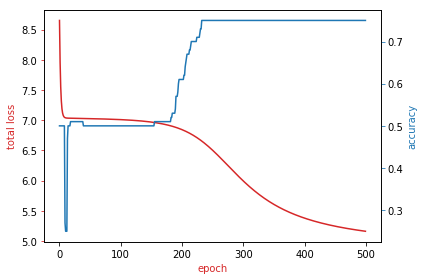

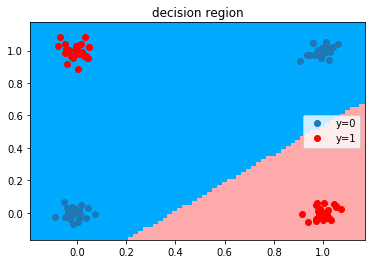

In [8]:
# Train the model

learning_rate = 0.1
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
LOSS1 = train(model, data_set, criterion, optimizer, accuracy, epochs=500)
plot_decision_regions_2class(model, data_set)

## 4. Two Neurons

In [9]:
# Create the model

model = Net(2, 2, 1)

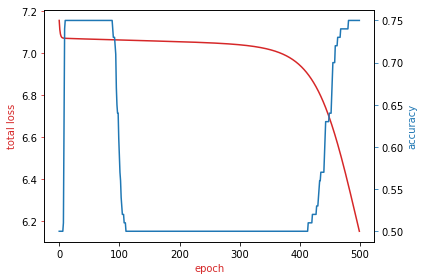

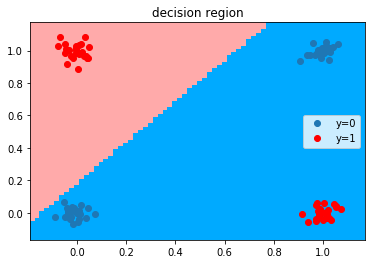

In [10]:
# Train the model

learning_rate = 0.1
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
LOSS2 = train(model, data_set, criterion, optimizer, accuracy, epochs=500)
plot_decision_regions_2class(model, data_set)

## 5. Three Neurons

In [11]:
# Create the model

model = Net(2, 3, 1)

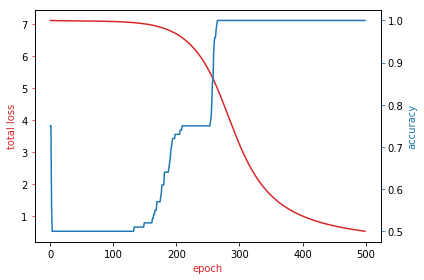

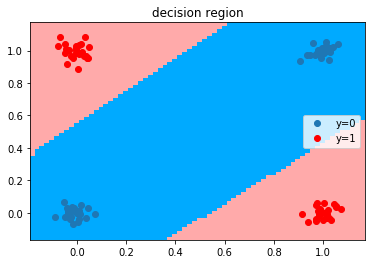

In [12]:
# Train the model

learning_rate = 0.1
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
LOSS3 = train(model, data_set, criterion, optimizer, accuracy, epochs=500)
plot_decision_regions_2class(model, data_set)